# nanoporeRunQC_quickRunner.ipynb
## Marcus Viscardi,    July 27, 2023

I want to generally just have this script run stuff from nanoporePipelineCommon.py, this is a notebook so I can test these a little easier!

In [1]:
import nanoporePipelineCommon as npC

import seaborn as sea
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from Bio import SeqIO
import pysam

import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

get_dt = npC.get_dt
print(f"Imports done at {get_dt(for_print=True)}")

Imports done at 09/20/23 @ 10:51:42 AM


In [2]:
obj_dict = {}
libs_to_run = [
    #"oldN2",
    # "oldS6",
    # "newerN2",
    "newerS6",
    "newerS5",
    # "thirdN2",
    # "thirdS5",
    "thirdS6",
]
for lib in libs_to_run:
    print(f"\nLoading {lib}...", end="")
    obj_dict[lib] = npC.NanoporeRun(run_nickname=lib)
    print(" Done!")


Loading newerS6... Done!

Loading newerS5... Done!

Loading thirdS6... Done!


In [3]:
spacing = 20

print_list = []
comma_print_list = []
for i, (lib, obj) in enumerate(obj_dict.items()):
    cdict = obj.get_read_counts_dict()
    if cdict['protein_coding'] <= 0:
        print(f"Getting read biotype counts for {lib}...")
        obj.get_read_biotype_count_dict()
    if cdict['adapted'] <= 0:
        print(f"Getting raw adapted counts for {lib}...")
        obj.get_raw_adapted_count()
    cdict = obj.get_read_counts_dict()
    string_list = [f"{lib:<{spacing-5}}"]
    comma_string_list = [f"{lib},"]
    key_string_list = [f"{'Library':<{spacing-5}}"]
    key_comma_string_list = [f"{'Library'},"]
    for key, value in cdict.items():
        string_list.append(f"{value:>{spacing},}")
        comma_string_list.append(f"{value},")
        key_string_list.append(f"{key.replace('_', ' ').title():>{spacing}}")
        key_comma_string_list.append(f"{key.replace('_', ' ').title()},")
    if i == 0:
        print_list.append(key_string_list)
        comma_print_list.append(key_comma_string_list)
    print_list.append(string_list)
    comma_print_list.append(comma_string_list)
print("\n".join(["".join(line) for line in print_list]))
# print("\n".join(["".join(line) for line in comma_print_list]))  # use this for pasting to google sheets

Getting read biotype counts for newerS6...
Getting raw adapted counts for newerS6...
Getting read biotype counts for newerS5...
Getting raw adapted counts for newerS5...
Getting read biotype counts for thirdS6...
Getting raw adapted counts for thirdS6...
Library                  Basecalled             Aligned     Primary Aligned         Tail Called       Gene Assigned Transcript Assigned  Standards Assigned      Protein Coding             Adapted
newerS6                   1,402,040           1,321,575           1,244,831             689,288             760,888             657,150             317,169             737,986              28,335
newerS5                     688,181             604,466             564,535             369,783             411,938             365,272              62,048             402,588              17,845
thirdS6                     625,889             602,793             573,013             193,229             531,774             168,828             321,588  

newerS6


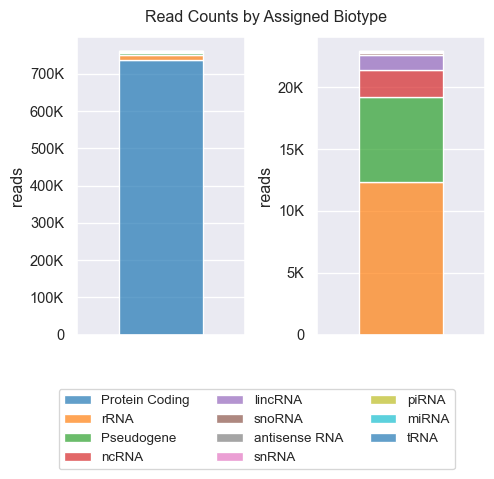

newerS5


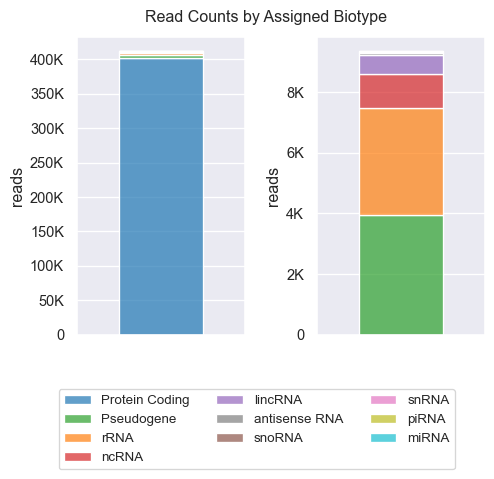

thirdS6


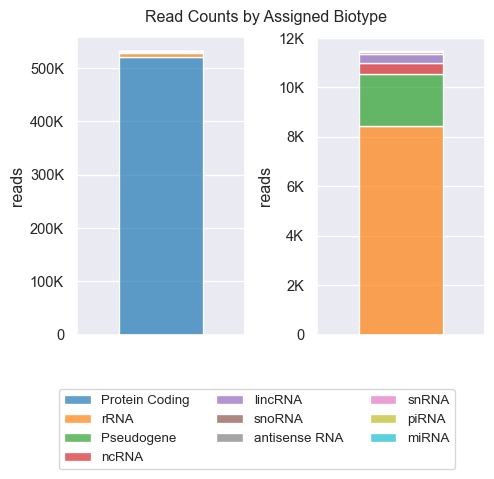

done.


In [5]:
sea.set_style('whitegrid')

for i, lib in enumerate(libs_to_run):
    lib_obj = obj_dict[lib]
    print(lib)
    lib_obj.biotypes_bar_plot()
print("done.")